In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import SetHisto
from Plot_func import SetGlobalStyle
from Plot_func import SetCanvas
from Plot_func import SetLegend
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
filetitle = "MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS"

png = ".png"
folder+=filetitle+"/"
filename = folder+filetitle+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      

In [3]:
hp0test   = ROOT.TH1D( 'hp0test', 'p0 Residuals Seed', 21, -4, 4 )
hp1test   = ROOT.TH1D( 'hp1test', 'p1 Residuals Seed', 21, -4, 4 )
hp2test   = ROOT.TH1D( 'hp2test', 'p2 Residuals Seed', 21, -4, 4 )
hp3test   = ROOT.TH1D( 'hp3test', 'p3 Residuals Seed', 21, -4, 4 )
hp4test   = ROOT.TH1D( 'hp4test', 'p4 Residuals Seed', 21, -4, 4 )

hp0testKend   = ROOT.TH1D( 'hp0testKend', 'p0 Residuals KFend', 21,-4,4)
hp1testKend   = ROOT.TH1D( 'hp1testKend', 'p1 Residuals KFend', 21,-4,4)
hp2testKend   = ROOT.TH1D( 'hp2testKend', 'p2 Residuals KFend', 21,-4,4)
hp3testKend   = ROOT.TH1D( 'hp3testKend', 'p3 Residuals KFend', 21,-4,4)
hp4testKend   = ROOT.TH1D( 'hp4testKend', 'p4 Residuals KFend', 21,-4,4)


In [4]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_MC.Y()
        xMC = t.xyz_MC.X()
        sinphiMC = t.sinphi_MC   
        tanlambdaMC = t.tanlambda_MC
        invpTMC = t.invpT_MC
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = -t.curvature_seed/(0.5*0.00299792458)

        if(t.status ==1):
            last_n = t.parvect_bkw.size()-1
            y = t.parvect_bkw[last_n][0]
            x = t.parvect_bkw[last_n][1]
            sinphi= t.parvect_bkw[last_n][2]
            tanlambda=t.parvect_bkw[last_n][3]
            invpT = t.parvect_bkw[last_n][4]
            p = np.abs((1/np.cos(np.arctan(t.parvect_bkw[last_n][3])))/t.parvect_bkw[last_n][4])
        else:
            y = t.xyz_seed.Y()
            x = t.xyz_seed.X()
            sinphi= t.sinphi_seed
            tanlambda=t.tanlambda_seed
            invpT = -t.curvature_seed/(0.5*0.00299792458)
            p =  np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t.curvature_seed)


        P00 = t.P_seed[0][0]
        P11 = t.P_seed[1][1]
        P22 = t.P_seed[2][2]
        P33 = t.P_seed[3][3]
        P44 = t.P_seed[4][4]


        P00K = t.Pt[t.Pt.size()-1][0][0]
        P11K = t.Pt[t.Pt.size()-1][1][1]
        P22K = t.Pt[t.Pt.size()-1][2][2]
        P33K = t.Pt[t.Pt.size()-1][3][3]
        P44K = t.Pt[t.Pt.size()-1][4][4]
        
        hp0test.Fill((ySeed-yMC)/np.sqrt(P00))
        hp1test.Fill((xSeed-xMC)/np.sqrt(P11))
        hp2test.Fill((sinphiSeed-sinphiMC)/np.sqrt(P22))
        hp3test.Fill((tanlambdaSeed-tanlambdaMC)/np.sqrt(P33))
        hp4test.Fill((invpTSeed-invpTMC)/np.sqrt(P44))

        hp0testKend.Fill((y-yMC)/np.sqrt(P00K))
        hp1testKend.Fill((x-xMC)/np.sqrt(P11K))
        hp2testKend.Fill((sinphi-sinphiMC)/np.sqrt(P22K))
        hp3testKend.Fill((tanlambda-tanlambdaMC)/np.sqrt(P33K))
        hp4testKend.Fill((invpT-invpTMC)/np.sqrt(P44K))

/tmp/ipykernel_504226/1212266519.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  hp0testKend.Fill((y-yMC)/np.sqrt(P00K))
/tmp/ipykernel_504226/1212266519.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  hp1testKend.Fill((x-xMC)/np.sqrt(P11K))
/tmp/ipykernel_504226/1212266519.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  hp2testKend.Fill((sinphi-sinphiMC)/np.sqrt(P22K))
/tmp/ipykernel_504226/1212266519.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  hp3testKend.Fill((tanlambda-tanlambdaMC)/np.sqrt(P33K))
/tmp/ipykernel_504226/1212266519.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  hp4testKend.Fill((invpT-invpTMC)/np.sqrt(P44K))


## Forward


### Seed

 FCN=20.5066 FROM MIGRAD    STATUS=CONVERGED     108 CALLS         109 TOTAL
                     EDM=4.42048e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.47817e+03   1.84683e+01   3.37352e-02  -1.15549e-05
   2  p1           1.75072e-02   1.02404e-02   2.31633e-05  -9.01386e-02
   3  p2           1.01255e+00   7.52368e-03   1.37295e-05  -1.22310e-02


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitSeed_p0.eps has been created


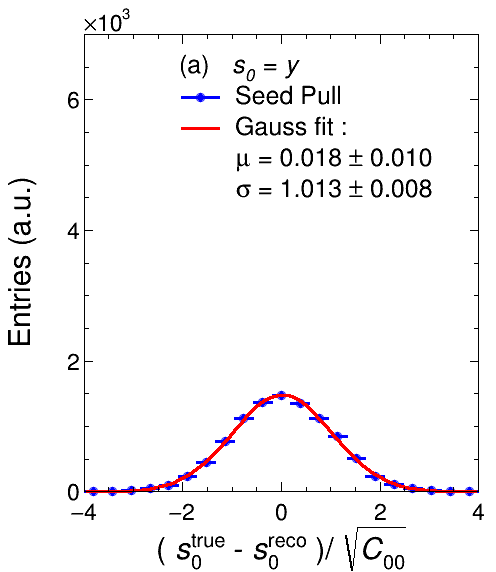

In [5]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus = ROOT.TF1("fgaus", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus.SetParameters(10000,0,1)
fgaus.SetLineWidth(3)
SetHisto(hp0test,";( #it{s}_{0}^{true} - #it{s}_{0}^{reco} )/ #sqrt{#it{C}_{00}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp0test.GetXaxis().SetTitleSize(0.065)
hp0test.GetXaxis().SetTitleOffset(0.95)
hp0test.GetYaxis().SetTitleSize(0.065)
hp0test.GetYaxis().SetTitleOffset(1.2)
hp0test.Fit("fgaus")
legend0 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend0)
legend0.SetTextSize(0.05*0.68*1.6)
legend0.SetHeader("(a)   #it{s_{0}} = #it{y}")
legend0.AddEntry(hp0test," Seed Pull","pl")
legend0.AddEntry(fgaus," Gauss fit :","l")
legend0.AddEntry(0," #mu = "+"%0.3f"%fgaus.GetParameter(1)+" #pm ""%0.3f"% fgaus.GetParError(1),"")
legend0.AddEntry(0," #sigma = "+"%0.3f"%fgaus.GetParameter(2)+" #pm ""%0.3f"% fgaus.GetParError(2),"")
ch0 = ROOT.TCanvas("h0","h0",500,600)
SetCanvas(ch0)
hp0test.Draw("E0")
legend0.Draw()
ch0.Draw()
save=folder+"UnitSeed_p0"+".eps"
ch0.Print(save)

 FCN=18.8285 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=7.93053e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.48142e+03   1.84593e+01   3.24608e-02   4.95690e-08
   2  p1           1.98987e-03   1.01959e-02   2.21690e-05   3.07333e-04
   3  p2           1.01031e+00   7.42403e-03   1.30554e-05  -2.43459e-04


Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitSeed_p1.eps has been created


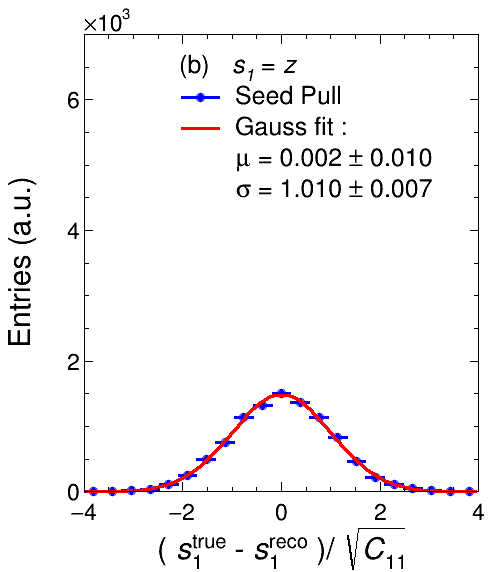

In [6]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus1 = ROOT.TF1("fgaus1", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus1.SetParameters(10000,0,1)
fgaus1.SetLineWidth(3)
SetHisto(hp1test,";( #it{s}_{1}^{true} - #it{s}_{1}^{reco} )/ #sqrt{#it{C}_{11}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp1test.GetXaxis().SetTitleSize(0.065)
hp1test.GetXaxis().SetTitleOffset(0.95)
hp1test.GetYaxis().SetTitleSize(0.065)
hp1test.GetYaxis().SetTitleOffset(1.2)
hp1test.Fit("fgaus1")
legend1 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend1)
legend1.SetTextSize(0.05*0.68*1.6)
legend1.SetHeader("(b)   #it{s_{1}} = #it{z}")
legend1.AddEntry(hp1test," Seed Pull","pl")
legend1.AddEntry(fgaus," Gauss fit :","l")
legend1.AddEntry(0," #mu = "+"%0.3f"%fgaus1.GetParameter(1)+" #pm ""%0.3f"% fgaus1.GetParError(1),"")
legend1.AddEntry(0," #sigma = "+"%0.3f"%fgaus1.GetParameter(2)+" #pm ""%0.3f"% fgaus1.GetParError(2),"")
ch1 = ROOT.TCanvas("h1","h1",500,600)
SetCanvas(ch1)
hp1test.Draw("E0")
legend1.Draw()
ch1.Draw()
save=folder+"UnitSeed_p1"+".eps"
ch1.Print(save)

 FCN=224.09 FROM MIGRAD    STATUS=CONVERGED     117 CALLS         118 TOTAL
                     EDM=1.10761e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.03003e+03   4.19884e+01  -6.12870e-02   1.80579e-06
   2  p1           4.75733e-03   4.91792e-03   8.18996e-05  -2.49897e-02
   3  p2           4.82107e-01   4.49691e-03   3.09306e-06  -2.12391e-02


Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitSeed_p2.eps has been created


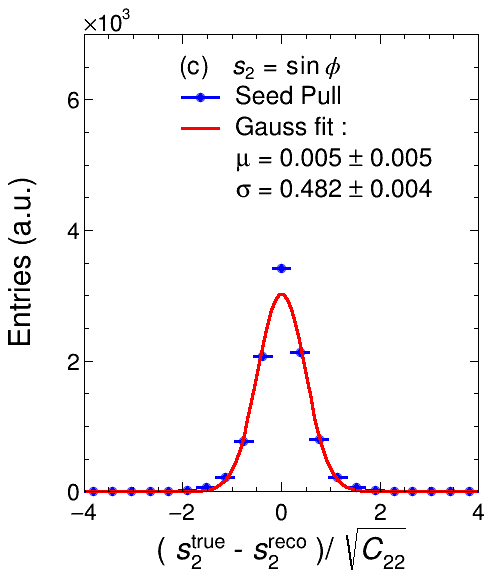

In [7]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus2 = ROOT.TF1("fgaus2", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus2.SetParameters(10000,0,1)
fgaus2.SetLineWidth(3)
SetHisto(hp2test,";( #it{s}_{2}^{true} - #it{s}_{2}^{reco} )/ #sqrt{#it{C}_{22}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp2test.GetXaxis().SetTitleSize(0.065)
hp2test.GetXaxis().SetTitleOffset(0.95)
hp2test.GetYaxis().SetTitleSize(0.065)
hp2test.GetYaxis().SetTitleOffset(1.2)
hp2test.Fit("fgaus2")
legend2 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend2)
legend2.SetTextSize(0.05*0.68*1.6)
legend2.SetHeader("(\\text{c}) \ {s}_{2} = \sin{\phi}")
legend2.AddEntry(hp2test," Seed Pull","pl")
legend2.AddEntry(fgaus2," Gauss fit :","l")
legend2.AddEntry(0," #mu = "+"%0.3f"%fgaus2.GetParameter(1)+" #pm ""%0.3f"% fgaus2.GetParError(1),"")
legend2.AddEntry(0," #sigma = "+"%0.3f"%fgaus2.GetParameter(2)+" #pm ""%0.3f"% fgaus2.GetParError(2),"")
ch2 = ROOT.TCanvas("h2","h2",500,600)
SetCanvas(ch2)
hp2test.Draw("E0")
legend2.Draw()
ch2.Draw()
save=folder+"UnitSeed_p2"+".eps"
ch2.Print(save)

 FCN=1280.05 FROM HESSE     STATUS=FAILED         15 CALLS         472 TOTAL
                     EDM=5.37849e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.54095e+03   2.73301e+01   4.77625e-01  -4.90467e-06
   2  p1          -4.86294e-03   5.56081e-03   9.71862e-05   2.80319e-03
   3  p2          -1.01234e+06   4.24264e-01  -0.00000e+00   0.00000e+00
   4  p3           5.17007e-01   4.62627e-03   5.58054e-06   8.77324e-03


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitSeed_p3.eps has been created


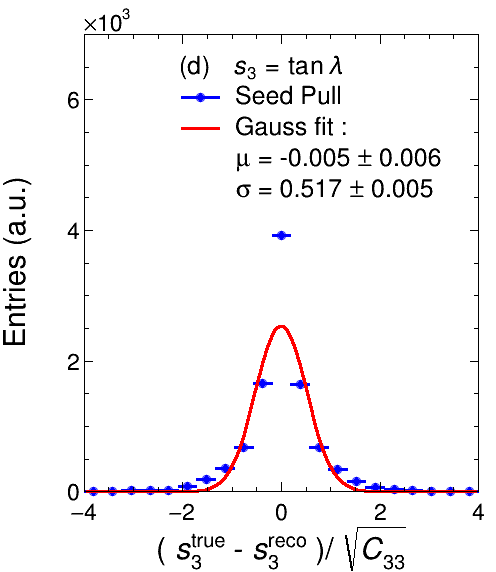

In [8]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus3 = ROOT.TF1("fgaus3", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus3.SetParameters(100,0,1)
fgaus3.SetParLimits(3,0.5,10)
fgaus3.SetParLimits(1,-1,1)
fgaus3.SetLineWidth(3)
SetHisto(hp3test,";( #it{s}_{3}^{true} - #it{s}_{3}^{reco} )/ #sqrt{#it{C}_{33}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp3test.GetXaxis().SetTitleSize(0.065)
hp3test.GetXaxis().SetTitleOffset(0.95)
hp3test.GetYaxis().SetTitleSize(0.065)
hp3test.GetYaxis().SetTitleOffset(1.3)
hp3test.Fit("fgaus3")
legend3 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend3)
legend3.SetTextSize(0.05*0.68*1.6)
legend3.SetHeader("(\\text{d})\ s_{3} = \\tan{\lambda}")
legend3.AddEntry(hp3test," Seed Pull","pl")
legend3.AddEntry(fgaus," Gauss fit :","l")
legend3.AddEntry(0," #mu = "+"%0.3f"%fgaus3.GetParameter(1)+" #pm ""%0.3f"% fgaus3.GetParError(1),"")
legend3.AddEntry(0," #sigma = "+"%0.3f"%fgaus3.GetParameter(3)+" #pm ""%0.3f"% fgaus3.GetParError(3),"")
ch3 = ROOT.TCanvas("h3","h3",500,600)
SetCanvas(ch3)
hp3test.Draw("E0")
legend3.Draw()
ch3.Draw()
save=folder+"UnitSeed_p3"+".eps"
ch3.Print(save)

 FCN=539.509 FROM HESSE     STATUS=FAILED         15 CALLS         433 TOTAL
                     EDM=1.39623e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.76007e+03   2.89645e+01   3.28800e-01  -3.09606e-06
   2  p1           4.18202e-03   5.04675e-03   5.72882e-05   1.35836e-02
   3  p2          -6.57577e+05   4.24264e-01  -0.00000e+00   0.00000e+00
   4  p3           5.00000e-01   6.80221e-04   1.16357e-04** at limit **


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitSeed_p4.eps has been created


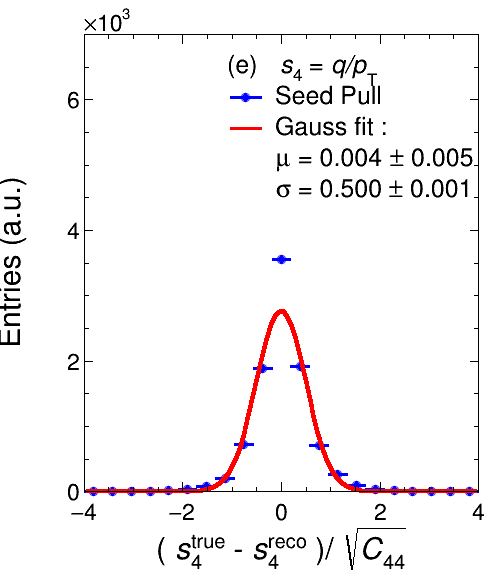

In [9]:
gStyle.SetOptStat(0)
SetGlobalStyle()

fgaus4 = ROOT.TF1("fgaus4", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus4.SetParameters(100,0,1)
fgaus4.SetParLimits(3,0.5,10)
fgaus4.SetParLimits(1,-1,1)
fgaus4.SetLineWidth(4)
SetHisto(hp4test,";( #it{s}_{4}^{true} - #it{s}_{4}^{reco} )/ #sqrt{#it{C}_{44}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp4test.GetXaxis().SetTitleSize(0.065)
hp4test.GetXaxis().SetTitleOffset(0.95)
hp4test.GetYaxis().SetTitleSize(0.065)
hp4test.GetYaxis().SetTitleOffset(1.4)
hp4test.Fit("fgaus4")
legend4 = ROOT.TLegend(0.45,0.64,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(e)   #it{s}_{4} = #it{q/p}_{T} ")
legend4.AddEntry(hp4test," Seed Pull","pl")
legend4.AddEntry(fgaus," Gauss fit :","l")
legend4.AddEntry(0," #mu = "+"%0.3f"%fgaus4.GetParameter(1)+" #pm ""%0.3f"% fgaus4.GetParError(1),"")
legend4.AddEntry(0," #sigma = "+"%0.3f"%fgaus4.GetParameter(3)+" #pm ""%0.3f"% fgaus4.GetParError(3),"")
ch4 = ROOT.TCanvas("h4","h4",500,600)
SetCanvas(ch4)
hp4test.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"UnitSeed_p4"+".eps"
ch4.Print(save)

### KF

 FCN=139.631 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=3.04654e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.42693e+03   1.92394e+01   8.53316e-02  -4.84476e-07
   2  p1          -6.53075e-02   1.05310e-02   5.97505e-05   1.07939e-02
   3  p2           9.98603e-01   8.66327e-03   3.79641e-05   2.73456e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitKFEnd_p0.eps has been created


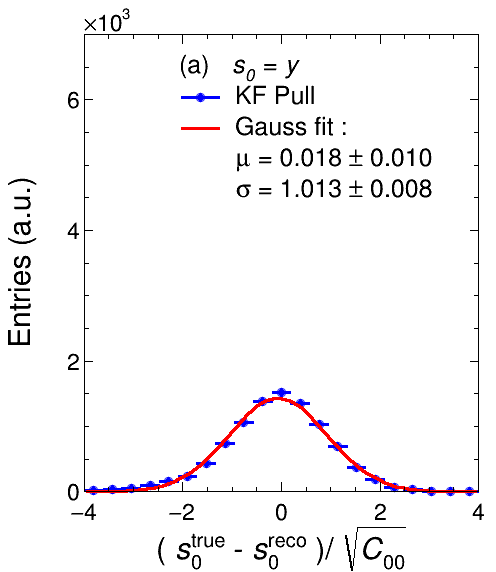

In [10]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus0 = ROOT.TF1("fgaus0", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus0.SetParameters(10000,0,1)
fgaus0.SetLineWidth(3)
SetHisto(hp0testKend,";( #it{s}_{0}^{true} - #it{s}_{0}^{reco} )/ #sqrt{#it{C}_{00}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp0testKend.GetXaxis().SetTitleSize(0.065)
hp0testKend.GetXaxis().SetTitleOffset(0.95)
hp0testKend.GetYaxis().SetTitleSize(0.065)
hp0testKend.GetYaxis().SetTitleOffset(1.2)
hp0testKend.Fit("fgaus0")
legend0 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend0)
legend0.SetTextSize(0.05*0.68*1.6)
legend0.SetHeader("(a)   #it{s_{0}} = #it{y}")
legend0.AddEntry(hp0testKend," KF Pull","pl")
legend0.AddEntry(fgaus," Gauss fit :","l")
legend0.AddEntry(0," #mu = "+"%0.3f"%fgaus.GetParameter(1)+" #pm ""%0.3f"% fgaus.GetParError(1),"")
legend0.AddEntry(0," #sigma = "+"%0.3f"%fgaus.GetParameter(2)+" #pm ""%0.3f"% fgaus.GetParError(2),"")
ch0 = ROOT.TCanvas("h0","h0",500,600)
SetCanvas(ch0)
hp0testKend.Draw("E0")
legend0.Draw()
ch0.Draw()
save=folder+"UnitKFEnd_p0"+".eps"
ch0.Print(save)

 FCN=86.2641 FROM MIGRAD    STATUS=CONVERGED     106 CALLS         107 TOTAL
                     EDM=4.02117e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.52446e+03   2.01269e+01   7.07236e-02   4.70414e-05
   2  p1           7.99829e-03   9.80685e-03   4.47423e-05   2.55262e-02
   3  p2           9.64035e-01   8.12047e-03   2.85391e-05   1.30412e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitKFEnd_p1.eps has been created


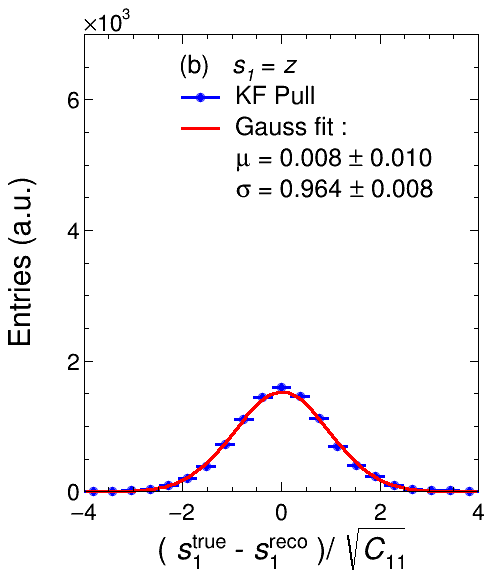

In [11]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus1 = ROOT.TF1("fgaus1", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus1.SetParameters(10000,0,1)
fgaus1.SetLineWidth(3)
SetHisto(hp1testKend,";( #it{s}_{1}^{true} - #it{s}_{1}^{reco} )/ #sqrt{#it{C}_{11}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp1testKend.GetXaxis().SetTitleSize(0.065)
hp1testKend.GetXaxis().SetTitleOffset(0.95)
hp1testKend.GetYaxis().SetTitleSize(0.065)
hp1testKend.GetYaxis().SetTitleOffset(1.2)
hp1testKend.Fit("fgaus1")
legend1 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend1)
legend1.SetTextSize(0.05*0.68*1.6)
legend1.SetHeader("(b)   #it{s_{1}} = #it{z}")
legend1.AddEntry(hp1test," KF Pull","pl")
legend1.AddEntry(fgaus1," Gauss fit :","l")
legend1.AddEntry(0," #mu = "+"%0.3f"%fgaus1.GetParameter(1)+" #pm ""%0.3f"% fgaus1.GetParError(1),"")
legend1.AddEntry(0," #sigma = "+"%0.3f"%fgaus1.GetParameter(2)+" #pm ""%0.3f"% fgaus1.GetParError(2),"")
ch1 = ROOT.TCanvas("h1","h1",500,600)
SetCanvas(ch1)
hp1testKend.Draw("E0")
legend1.Draw()
ch1.Draw()
save=folder+"UnitKFEnd_p1"+".eps"
ch1.Print(save)

 FCN=99.0561 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=9.83853e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.18402e+03   1.61572e+01   6.00591e-02  -2.93800e-06
   2  p1          -6.55560e-02   1.24494e-02   6.06919e-05  -6.58375e-04
   3  p2           1.19089e+00   1.06393e-02   3.95054e-05  -5.23535e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitKFEnd_p2.eps has been created


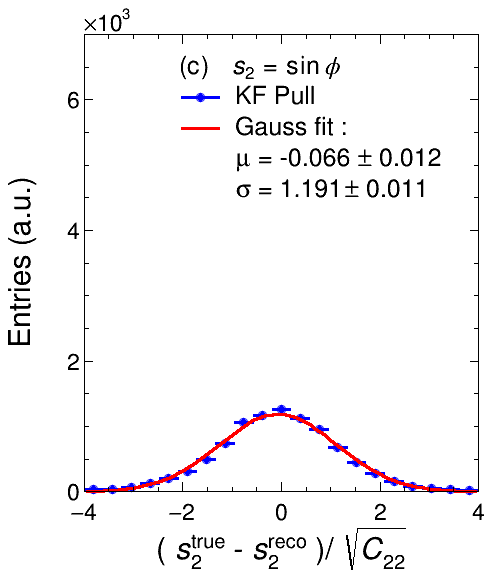

In [12]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus2 = ROOT.TF1("fgaus2", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus2.SetParameters(10000,0,1)
fgaus2.SetLineWidth(3)
SetHisto(hp2testKend,";( #it{s}_{2}^{true} - #it{s}_{2}^{reco} )/ #sqrt{#it{C}_{22}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp2testKend.GetXaxis().SetTitleSize(0.065)
hp2testKend.GetXaxis().SetTitleOffset(0.95)
hp2testKend.GetYaxis().SetTitleSize(0.065)
hp2testKend.GetYaxis().SetTitleOffset(1.2)
hp2testKend.Fit("fgaus2")
legend2 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend2)
legend2.SetTextSize(0.05*0.68*1.6)
legend2.SetHeader("(\\text{c}) \ {s}_{2} = \sin{\phi}")
legend2.AddEntry(hp2test," KF Pull","pl")
legend2.AddEntry(fgaus2," Gauss fit :","l")
legend2.AddEntry(0," #mu = "+"%0.3f"%fgaus2.GetParameter(1)+" #pm ""%0.3f"% fgaus2.GetParError(1),"")
legend2.AddEntry(0," #sigma = "+"%0.3f"%fgaus2.GetParameter(2)+" #pm ""%0.3f"% fgaus2.GetParError(2),"")
ch2 = ROOT.TCanvas("h2","h2",500,600)
SetCanvas(ch2)
hp2testKend.Draw("E0")
legend2.Draw()
ch2.Draw()
save=folder+"UnitKFEnd_p2"+".eps"
ch2.Print(save)

 FCN=239.162 FROM HESSE     STATUS=FAILED         15 CALLS         401 TOTAL
                     EDM=2.85992e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.45350e+03   1.49166e+01   1.12878e-01   5.12282e-05
   2  p1          -1.01775e-02   1.01933e-02   7.71351e-05  -3.72524e-03
   3  p2          -4.38326e+05   4.24264e-01  -0.00000e+00   0.00000e+00
   4  p3           9.92833e-01   6.91964e-03  -1.89847e-05  -2.94374e-01


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitKFEnd_p3.eps has been created


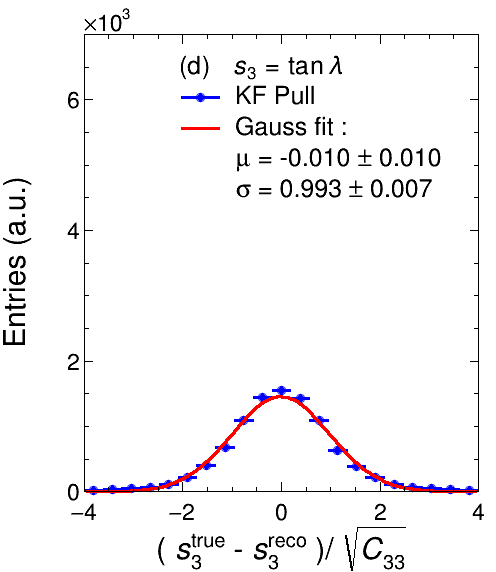

In [13]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus3 = ROOT.TF1("fgaus3", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus3.SetParameters(100,0,1)
fgaus3.SetParLimits(3,0.5,10)
fgaus3.SetParLimits(1,-1,1)
fgaus3.SetLineWidth(3)
SetHisto(hp3testKend,";( #it{s}_{3}^{true} - #it{s}_{3}^{reco} )/ #sqrt{#it{C}_{33}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp3testKend.GetXaxis().SetTitleSize(0.065)
hp3testKend.GetXaxis().SetTitleOffset(0.95)
hp3testKend.GetYaxis().SetTitleSize(0.065)
hp3testKend.GetYaxis().SetTitleOffset(1.3)
hp3testKend.Fit("fgaus3")
legend3 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend3)
legend3.SetTextSize(0.05*0.68*1.6)
legend3.SetHeader("(\\text{d})\ s_{3} = \\tan{\lambda}")
legend3.AddEntry(hp3test," KF Pull","pl")
legend3.AddEntry(fgaus," Gauss fit :","l")
legend3.AddEntry(0," #mu = "+"%0.3f"%fgaus3.GetParameter(1)+" #pm ""%0.3f"% fgaus3.GetParError(1),"")
legend3.AddEntry(0," #sigma = "+"%0.3f"%fgaus3.GetParameter(3)+" #pm ""%0.3f"% fgaus3.GetParError(3),"")
ch3 = ROOT.TCanvas("h3","h3",500,600)
SetCanvas(ch3)
hp3testKend.Draw("E0")
legend3.Draw()
ch3.Draw()
save=folder+"UnitKFEnd_p3"+".eps"
ch3.Print(save)

 FCN=151.975 FROM MIGRAD    STATUS=CONVERGED     273 CALLS         274 TOTAL
                     EDM=5.46225e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00724e+03   1.43847e+01  -8.78873e-03   2.36327e-08
   2  p1           1.46899e-02   1.45546e-02   2.27656e-05   2.66481e-03
   3  p2           0.00000e+00   1.80937e+00  -0.00000e+00   0.00000e+00
   4  p3           1.35612e+00   1.34278e-02  -4.34987e-06  -4.49463e-03


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS/UnitKFEnd_p4.eps has been created


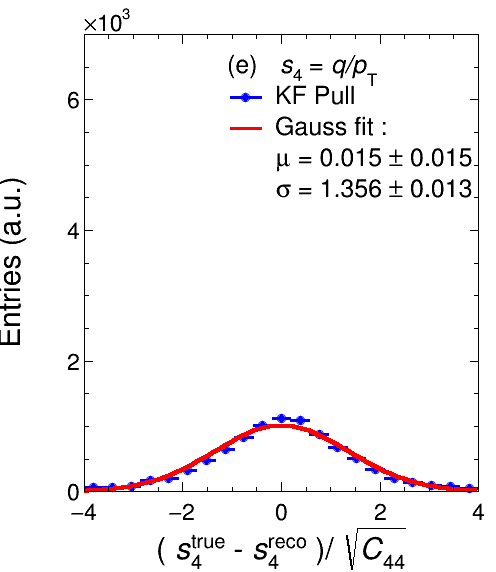

In [14]:
gStyle.SetOptStat(0)
SetGlobalStyle()

fgaus4 = ROOT.TF1("fgaus4", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus4.SetParameters(100,0,1)
fgaus4.SetParLimits(3,0.5,10)
fgaus4.SetParLimits(1,-1,1)
fgaus4.SetLineWidth(4)
SetHisto(hp4testKend,";( #it{s}_{4}^{true} - #it{s}_{4}^{reco} )/ #sqrt{#it{C}_{44}};Entries (a.u.)",ROOT.kBlue,20,[0,7000])
hp4testKend.GetXaxis().SetTitleSize(0.065)
hp4testKend.GetXaxis().SetTitleOffset(0.95)
hp4testKend.GetYaxis().SetTitleSize(0.065)
hp4testKend.GetYaxis().SetTitleOffset(1.4)
hp4testKend.Fit("fgaus4")
legend4 = ROOT.TLegend(0.45,0.64,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(e)   #it{s}_{4} = #it{q/p}_{T} ")
legend4.AddEntry(hp4test," KF Pull","pl")
legend4.AddEntry(fgaus," Gauss fit :","l")
legend4.AddEntry(0," #mu = "+"%0.3f"%fgaus4.GetParameter(1)+" #pm ""%0.3f"% fgaus4.GetParError(1),"")
legend4.AddEntry(0," #sigma = "+"%0.3f"%fgaus4.GetParameter(3)+" #pm ""%0.3f"% fgaus4.GetParError(3),"")
ch4 = ROOT.TCanvas("h4","h4",500,600)
SetCanvas(ch4)
hp4testKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"UnitKFEnd_p4"+".eps"
ch4.Print(save)